# 🎨🌞 Albedo Experiment

### Originally created by Dr. A. Denvil-Sommer (NCAS, Univerity of Reading).

## 🌊 Ocean Albedo and Climate Sensitivity

The surface albedo of the global ocean is a critical factor in Earth’s climate system. Even small changes in ocean albedo can significantly alter the global energy budget, which in turn impacts atmospheric circulation, ocean currents, and the hydrological cycle.

Typical ocean albedo values range from 0.06 to 0.10, with lower values near the equator and slightly higher values near the poles due to changes in sun angle and surface roughness.

## 🎯 Objective

Investigate how increasing ocean **albedo (reflectivity)** affects surface temperature and the atmosphere when coupled with land and ocean models in SpeedyWeather.jl.

## 🌊🧪 Ocean Albedo Experiment Setup
We will explore how changes in ocean albedo affect the atmosphere by comparing two simulations:

**🔹 Control Run (Realistic Albedo)**

Set a typical global ocean albedo with a slight increase toward the poles:
`set!(albedo.ocean, (λ, φ) -> 0.06 + 0.04 * abs(φ)/90)`.

**🔸 Perturbed Run (High Albedo)**

Now increase the ocean albedo uniformly to examine its impact:
`set!(albedo.ocean, (λ, φ) -> 0.16 + 0.04 * abs(φ)/90)`. 

⚠️ Important: Save each simulation to a separate folder or give output files unique names, so you can easily compare results later without overwriting.

## 🔬 🧠 Guiding Questions

- How did the surface temperature respond to increased ocean albedo?

- Do the equator-to-pole temperature gradients change?

- Is there a noticeable impact on precipitation patterns?

- How do atmospheric circulation fields (e.g., zonal wind) respond?

- Can you relate these effects to Earth’s climate sensitivity or feedbacks?

## 💾 Variables to Invistigate 

To investigate the effects of ocean albedo changes, you should save the following variables from your simulation output:

- **🌊 Sea Surface Temperature (SST)**
`simulation.prognostic_variables.ocean.sea_surface_temperature`

- **💧 Specific Humidity**
`simulation.diagnostic_variables.grid.humid_grid`

- **🌬️ Surface Winds (Zonal and Meridional)**
`simulation.diagnostic_variables.grid.u_grid`
`simulation.diagnostic_variables.grid.v_grid`

- **🌧️ Precipitation (Large-scale)**
`simulation.diagnostic_variables.physics.precip_large_scale`

- **📉 Pressure Tendency (for Hadley Cell analysis)**
`simulation.diagnostic_variables.tendencies.pres_tend`

👉 You may also consider saving additional variables depending on the focus of your analysis.

In [1]:
using SpeedyWeather
using Dates
using CairoMakie

In [3]:
# 1. Define the grid and components
spectral_grid = SpectralGrid(trunc=31, nlayers=8)
output = NetCDFOutput(spectral_grid, PrimitiveWetModel, id="Ocean_Albedo", output_dt=Minute(180))
add!(output, SpeedyWeather.TemperatureOutput(), SpeedyWeather.LargeScalePrecipitationOutput())  # output also temperature and precip

NetCDFOutput{FullGaussianGrid{Float32}}
├ status: inactive/uninitialized
├ write restart file: true (if active)
├ interpolator: AnvilInterpolator{Float32, OctahedralGaussianGrid, SpeedyWeather.RingGrids.GridGeometry{OctahedralGaussianGrid, Vector{Float64}, Vector{Int64}, Vector{UnitRange{Int64}}}, SpeedyWeather.RingGrids.AnvilLocator{Float32, Vector{Float32}, Vector{Int64}}}
├ path: output.nc
├ frequency: 10800 seconds
└┐ variables:
 ├ v: meridional wind [m/s]
 ├ humid: specific humidity [kg/kg]
 ├ temp: temperature [degC]
 ├ u: zonal wind [m/s]
 ├ pres: surface pressure [hPa]
 ├ precip_cond: accumulated large-scale precipitation [mm]
 └ vor: relative vorticity [s^-1]

In [4]:
# 2. Create land and ocean models
temperature = LandBucketTemperature(spectral_grid)
soil_moisture = LandBucketMoisture(spectral_grid)
land = LandModel(spectral_grid; temperature, soil_moisture)
ocean = SlabOcean(spectral_grid)

SlabOcean{Float32} <: AbstractOcean
├ temp_equator::Float32 = 302.0
├ temp_poles::Float32 = 273.0
├ specific_heat_capacity::Float32 = 4184.0
├ mixed_layer_depth::Float32 = 10.0
├ density::Float32 = 1000.0
├ mask::Bool = false
└ heat_capacity_mixed_layer::Float32 = 4.184e7

In [5]:
# 3. Set up albedo component
# Create a ManualAlbedo object
manual = ManualAlbedo(spectral_grid)

# Create the composite albedo object
albedo = Albedo(manual, manual)

# Set land and ocean albedo patterns using the composite object
set!(albedo.land, (λ, φ) -> 0.3 + 0.2 * abs(φ)/90)
set!(albedo.ocean, (λ, φ) -> 0.06 + 0.04 * abs(φ)/90)

3168-element, 48-ring OctahedralGaussianGrid{Float32}:
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 ⋮
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374
 0.098737374

In [7]:
# 4. Build the coupled model
# initial_conditions = StartFromRest()
model = PrimitiveWetModel(spectral_grid; land, ocean, albedo)

# 5. Initialize and run
simulation = initialize!(model)
run!(simulation, period=Day(5))

Weather is speedy: 100%|██████████████████| Time: 0:00:01 (941.80 years/day)


                      Surface relative vorticity [1/s]                      
       ┌────────────────────────────────────────────────────────────┐0.0001 
    90 │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ ┌──┐  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
    ˚N │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│  

In [8]:
simulation.model

PrimitiveWetModel <: PrimitiveWet
├ spectral_grid: SpectralGrid
├ device_setup: SpeedyWeather.DeviceSetup{CPU, DataType}
├ dynamics: Bool
├ geometry: Geometry{Float32, OctahedralGaussianGrid, Vector{Float32}, Vector{Float64}}
├ planet: Earth{Float32}
├ atmosphere: EarthAtmosphere{Float32}
├ coriolis: Coriolis{Float32, Vector{Float32}}
├ geopotential: Geopotential{Float32, Vector{Float32}}
├ adiabatic_conversion: AdiabaticConversion{Float32, Vector{Float32}}
├ particle_advection: NoParticleAdvection
├ initial_conditions: InitialConditions{ZonalWind, PressureOnOrography, JablonowskiTemperature, ConstantRelativeHumidity}
├ forcing: NoForcing
├ drag: NoDrag
├ random_process: NoRandomProcess
├ tracers: Dict{Symbol, Tracer}
├ orography: EarthOrography{Float32, OctahedralGaussianGrid{Float32}, LowerTriangularMatrix{ComplexF32}}
├ land_sea_mask: EarthLandSeaMask{Float32, OctahedralGaussianGrid{Float32}}
├ ocean: SlabOcean{Float32}
├ land: LandModel{LandGeometry{Float32, Vector{Float32}}, LandT

In [11]:
?PhysicsVariables

search: PhysicsVariables



Diagnostic variables of the physical parameterizations.

  * `nlat_half::Int64`
  * `ocean::DynamicsVariablesOcean`
  * `land::DynamicsVariablesLand`
  * `precip_large_scale::Any`: Accumulated large-scale precipitation [m]
  * `precip_convection::Any`: Accumulated large-scale precipitation [m]
  * `precip_rate_large_scale::Any`: Rate of large-scale precipitation [m/s], instantaneous
  * `precip_rate_convection::Any`: Rate of large-scale precipitation [m/s], instantaneous
  * `cloud_top::Any`: Cloud top [m]
  * `sensible_heat_flux::Any`: Sensible heat flux [W/m²], positive up
  * `evaporative_flux::Any`: Evaporative flux [kg/s/m^2], positive up
  * `surface_shortwave_up::Any`: Surface radiation: shortwave up [W/m²]
  * `surface_shortwave_down::Any`: Surface radiation: shortwave down [W/m²]
  * `surface_longwave_up::Any`: Surface radiation: longwave up [W/m²]
  * `surface_longwave_down::Any`: Surface radiation: longwave down [W/m²]
  * `outgoing_shortwave_radiation::Any`: Outgoing shortwave radiation [W/m^2]
  * `outgoing_longwave_radiation::Any`: Outgoing longwave radiation [W/m^2]
  * `albedo::Any`: Albedo [1]
  * `cos_zenith::Any`: Cosine of solar zenith angle [1]

---

```julia
PhysicsVariables(
    SG::SpectralGrid
) -> PhysicsVariables{<:AbstractFloat, <:AbstractArray, <:AbstractArray}

```

Generator function.


In [9]:
simulation.diagnostic_variables.physics

PhysicsVariables
├ ocean: DynamicsVariablesOcean{Float32, Array, OctahedralGaussianGrid{Float32}}
├ land: DynamicsVariablesLand{Float32, Array, OctahedralGaussianGrid{Float32}}
├ precip_large_scale: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ precip_convection: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ precip_rate_large_scale: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ precip_rate_convection: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ cloud_top: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ sensible_heat_flux: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ evaporative_flux: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ surface_shortwave_up: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ surface_shortwave_down: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ surface_longwave_up: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ surface_longwave_down: 3168-element, 48-ring Oc

In [29]:
simulation.diagnostic_variables.physics.ocean

DynamicsVariablesOcean
├ sensible_heat_flux: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ evaporative_flux: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ surface_shortwave_up: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ surface_longwave_up: 3168-element, 48-ring OctahedralGaussianArray{Float32}
└ albedo: 3168-element, 48-ring OctahedralGaussianArray{Float32}

In [30]:
simulation.diagnostic_variables.grid

GridVariables
├ vor_grid: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ div_grid: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ temp_grid: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ temp_virt_grid: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ humid_grid: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ u_grid: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ v_grid: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ pres_grid: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ tracers_grid: Dict{Symbol, OctahedralGaussianArray{Float32, 2, Matrix{Float32}}}
├ random_pattern: 3168-element, 48-ring OctahedralGaussianArray{Float32}
├ temp_grid_prev: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ humid_grid_prev: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ u_grid_prev: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ v_grid_prev: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ pres_grid_prev: 3168-element, 48-ring OctahedralGaussianArray{Flo

In [32]:
simulation.diagnostic_variables.tendencies

Tendencies
├ vor_tend: 33×32×8, T31 LowerTriangularArray{ComplexF32}
├ div_tend: 33×32×8, T31 LowerTriangularArray{ComplexF32}
├ temp_tend: 33×32×8, T31 LowerTriangularArray{ComplexF32}
├ humid_tend: 33×32×8, T31 LowerTriangularArray{ComplexF32}
├ u_tend: 33×32×8, T31 LowerTriangularArray{ComplexF32}
├ v_tend: 33×32×8, T31 LowerTriangularArray{ComplexF32}
├ pres_tend: 33×32, T31 LowerTriangularArray{ComplexF32}
├ tracers_tend: Dict{Symbol, LowerTriangularArray{ComplexF32, 2, Matrix{ComplexF32}}}
├ u_tend_grid: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ v_tend_grid: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ temp_tend_grid: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ humid_tend_grid: 3168×8, 48-ring OctahedralGaussianArray{Float32}
├ pres_tend_grid: 3168-element, 48-ring OctahedralGaussianArray{Float32}
└ tracers_tend_grid: Dict{Symbol, OctahedralGaussianArray{Float32, 2, Matrix{Float32}}}

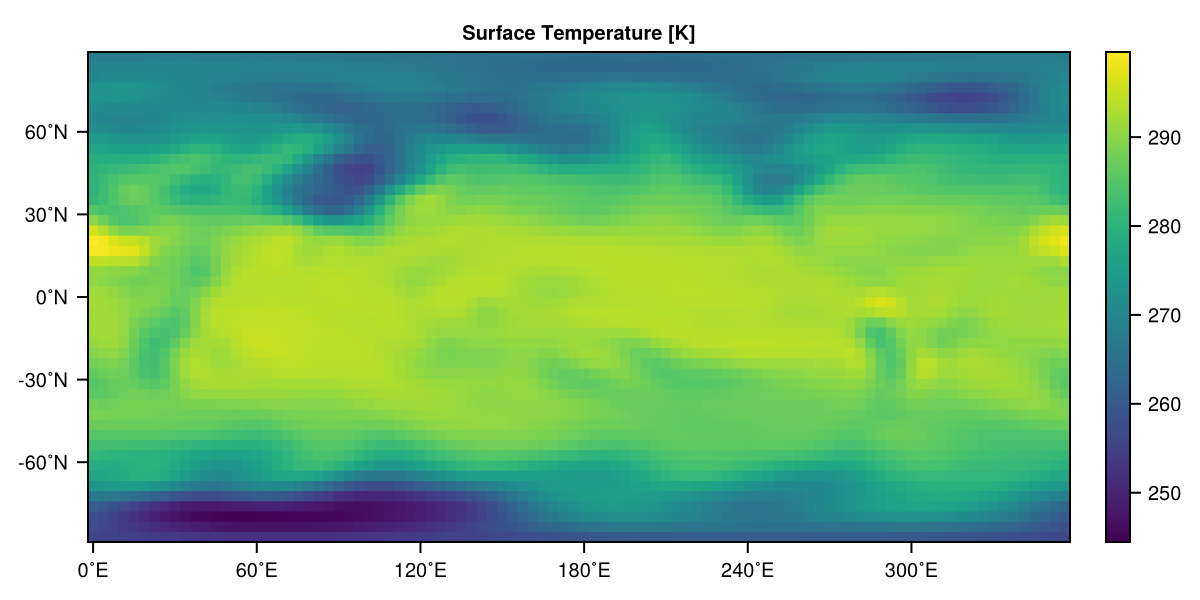

In [17]:
T = simulation.diagnostic_variables.grid.temp_grid[:, 8]
heatmap(T, title="Surface Temperature [K]")

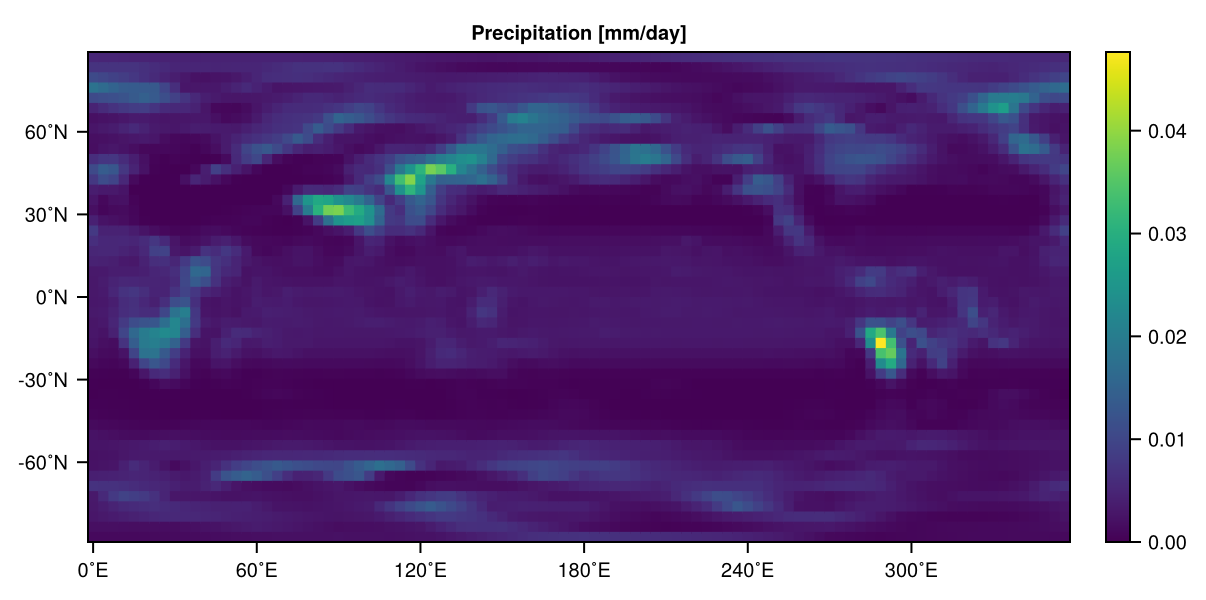

In [25]:
P = simulation.diagnostic_variables.physics.precip_large_scale
heatmap(P, title="Precipitation [mm/day]")

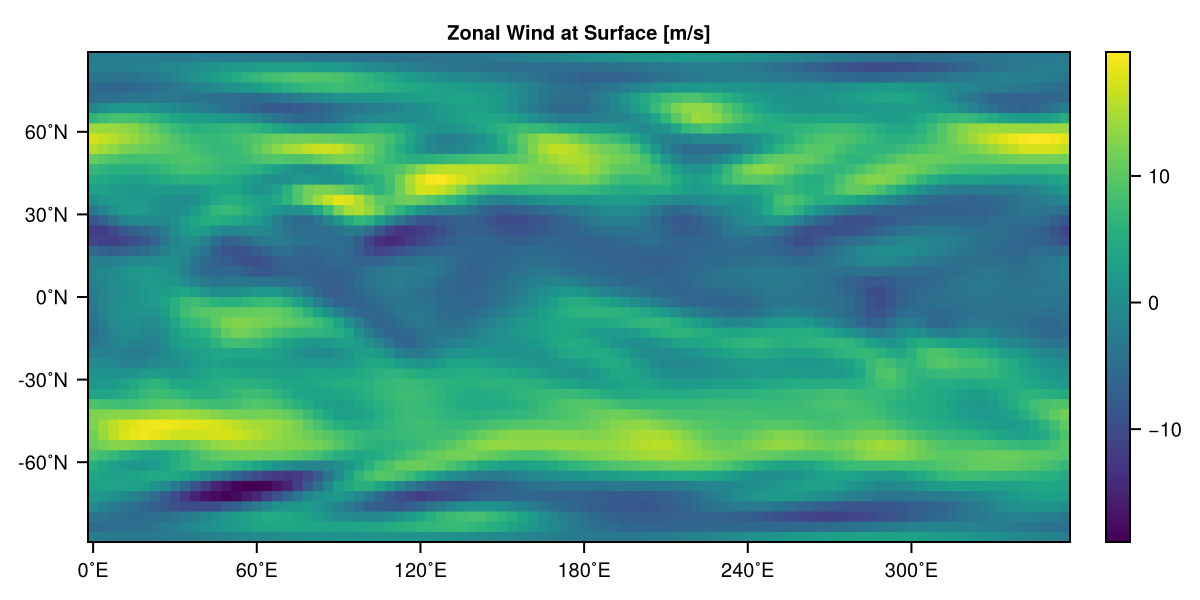

In [20]:
U = simulation.diagnostic_variables.grid.u_grid[:, 8]
heatmap(U, title="Zonal Wind at Surface [m/s]")

## 🧪 Advanced Experiments: Exploring Parameterization Choices
You can explore how different physical parameterizations affect your simulation results. Try changing individual components such as condensation, convection, or land surface processes to see their impact.

**🌧️ Large-scale condensation scheme**
`large_scale_condensation = ImplicitCondensation(spectral_grid)`

**🌩️ Convection scheme**
`convection = SimplifiedBettsMiller(spectral_grid)`

**💨 Optional: Disable surface evaporation (use with caution!)**
`surface_evaporation = NoSurfaceEvaporation(spectral_grid)`

**🌱 Land surface thermodynamics: change soil heat conductivity**
`thermodynamics = LandThermodynamics(spectral_grid, heat_conductivity = 0.25)`

💡 Tip: You can mix and match these components when building your model to design sensitivity experiments. Be sure this paramterisation choise is the same for control and perturbed runs! 